In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import yfinance as yf
import statsmodels.api as sm
%matplotlib inline

In [17]:
tickers_list = ['ABG.JO', 'SBK.JO', 'CL=F', 'NED.JO', 'CPI.JO', '^J203.JO']
data = yf.download(tickers_list,'2016-1-1', '2020-12-31')['Adj Close']
data = data.dropna()
data.head()

[*********************100%***********************]  6 of 6 completed


,ABG.JO,CL=F,CPI.JO,NED.JO,SBK.JO,^J203.JO
Date,,,,,,
2016-01-04,9453.481445,36.759998,48771.425781,13231.250000,8153.298340,49316.609375
2016-01-05,9603.624023,35.970001,48219.300781,13314.525391,8180.396484,49599.718750
2016-01-06,9425.676758,33.970001,47915.621094,13259.737305,8129.860352,49082.289062
2016-01-07,9036.416016,33.270000,47851.207031,12862.355469,7885.962891,48052.781250
2016-01-08,9175.437500,33.160000,47120.554688,12559.203125,7646.462402,48104.679688


In [18]:
x = data.head().round(2)
x

,ABG.JO,CL=F,CPI.JO,NED.JO,SBK.JO,^J203.JO
Date,,,,,,
2016-01-04,9453.48,36.76,48771.43,13231.25,8153.30,49316.61
2016-01-05,9603.62,35.97,48219.30,13314.53,8180.40,49599.72
2016-01-06,9425.68,33.97,47915.62,13259.74,8129.86,49082.29
2016-01-07,9036.42,33.27,47851.21,12862.36,7885.96,48052.78
2016-01-08,9175.44,33.16,47120.55,12559.20,7646.46,48104.68


In [4]:
rates = data.pct_change()
rates = rates.iloc[1:,:]
rates.head().round(5)

,ABG.JO,CL=F,CPI.JO,NED.JO,SBK.JO,^J203.JO
Date,,,,,,
2016-01-05,0.01588,-0.02149,-0.01132,0.00629,0.00332,0.00574
2016-01-06,-0.01853,-0.05560,-0.00630,-0.00411,-0.00618,-0.01043
2016-01-07,-0.04130,-0.02061,-0.00134,-0.02997,-0.03000,-0.02098
2016-01-08,0.01538,-0.00331,-0.01527,-0.02357,-0.03037,0.00108
2016-01-11,-0.04167,-0.05277,-0.04308,-0.01413,-0.04215,0.00453


In [5]:
mean_vector = rates.values.T.mean(axis=1)
mean_vector

array([ 0.00054146, -0.00159138,  0.00123428,  0.00043714,  0.00056991,
        0.00031828])

In [6]:
Y = rates.values - mean_vector
cov = np.cov(Y.T)
eigen_values, eigen_vectors = np.linalg.eig(cov)

In [7]:
eigen_values

array([8.78002111e-03, 1.76620041e-03, 3.53620011e-04, 1.18744305e-04,
       7.21367283e-05, 9.72846079e-05])

In [8]:
eigen_vectors

array([[-0.01969931,  0.52031564, -0.24292948, -0.79661519, -0.14477106,
         0.11964283],
       [-0.9989244 , -0.04439166,  0.00456113, -0.00758299,  0.00237734,
        -0.00977053],
       [-0.01353457,  0.4342062 ,  0.88615514, -0.02134375,  0.07715008,
        -0.14001128],
       [-0.02139233,  0.52832462, -0.35113386,  0.36418561, -0.07300872,
        -0.67761275],
       [-0.02963294,  0.47809148, -0.17178782,  0.36884347,  0.48411452,
         0.60879143],
       [-0.01559004,  0.17626009,  0.05373526,  0.31018465, -0.85637983,
         0.36905409]])

[78.47707796751789, 15.786550560335765, 3.1607059715746373, 1.0613534910725884, 0.8695436677875155, 0.6447683417115913]


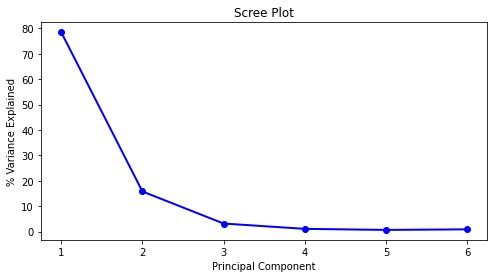

In [9]:
x = eigen_values
w = []
z = []
cnt = 1
for i in x:
    w.append(100*(i/sum(x)))
    z.append(cnt)
    cnt+=1
print(sorted(w, key=float, reverse=True))
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(z, w,'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('% Variance Explained')
plt.show()

In [10]:
# loading = eigen_vectors.T * np.sqrt(eigen_values)
loading = pd.DataFrame(eigen_vectors)
loading.columns = ['FL1', 'FL2', 'FL3', 'FL4', 'FL5', 'FL6']
loading.index = rates.columns
print(loading)

               FL1       FL2       FL3       FL4       FL5       FL6
ABG.JO   -0.019699  0.520316 -0.242929 -0.796615 -0.144771  0.119643
CL=F     -0.998924 -0.044392  0.004561 -0.007583  0.002377 -0.009771
CPI.JO   -0.013535  0.434206  0.886155 -0.021344  0.077150 -0.140011
NED.JO   -0.021392  0.528325 -0.351134  0.364186 -0.073009 -0.677613
SBK.JO   -0.029633  0.478091 -0.171788  0.368843  0.484115  0.608791
^J203.JO -0.015590  0.176260  0.053735  0.310185 -0.856380  0.369054


In [11]:
pc = pd.DataFrame(eigen_vectors)
pc

,0,1,2,3,4,5
0,-0.019699,0.520316,-0.242929,-0.796615,-0.144771,0.119643
1,-0.998924,-0.044392,0.004561,-0.007583,0.002377,-0.009771
2,-0.013535,0.434206,0.886155,-0.021344,0.077150,-0.140011
3,-0.021392,0.528325,-0.351134,0.364186,-0.073009,-0.677613
4,-0.029633,0.478091,-0.171788,0.368843,0.484115,0.608791
5,-0.015590,0.176260,0.053735,0.310185,-0.856380,0.369054


In [12]:
factors = np.matmul(Y , eigen_vectors)
factors = pd.DataFrame(factors)
factors = factors.iloc[:,0:3]
factors.columns = ['F1','F2','F3']
f = factors.head().round(5)
f

,F1,F2,F3
0,0.01945,0.00878,-0.01718
1,0.05489,-0.01832,-0.00011
2,0.02174,-0.05648,0.02258
3,0.00306,-0.02671,-0.00445
4,0.05407,-0.06631,-0.01657


In [13]:
X = factors.values
a = sm.add_constant(X)
alph_beta = []
R = []

In [14]:
for i in rates.columns:
    y = rates[i]
    ri = sm.OLS(y, a).fit()
    alph_beta.append(ri.params.values)
    R.append([ri.rsquared, ri.rsquared_adj])

In [15]:
res = pd.DataFrame(np.array(alph_beta), columns = ['alpha', 'beta_1', 'beta_2', 'beta_3'], index = rates.columns)
res.round(5)

,alpha,beta_1,beta_2,beta_3
ABG.JO,0.00054,-0.01970,0.52032,-0.24293
CL=F,-0.00159,-0.99892,-0.04439,0.00456
CPI.JO,0.00123,-0.01353,0.43421,0.88616
NED.JO,0.00044,-0.02139,0.52832,-0.35113
SBK.JO,0.00057,-0.02963,0.47809,-0.17179
^J203.JO,0.00032,-0.01559,0.17626,0.05374


In [16]:
R = pd.DataFrame(np.array(R), columns = ['R2', 'Adj_R2'], index = rates.columns)
R.round(3)

,R2,Adj_R2
ABG.JO,0.865,0.865
CL=F,1.000,1.000
CPI.JO,0.996,0.996
NED.JO,0.899,0.899
SBK.JO,0.859,0.859
^J203.JO,0.428,0.427
